In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('flight price.csv')

In [42]:
df.shape

(300153, 12)

In [43]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [45]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [46]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [47]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [48]:
df.corr(numeric_only=True)

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


<Axes: >

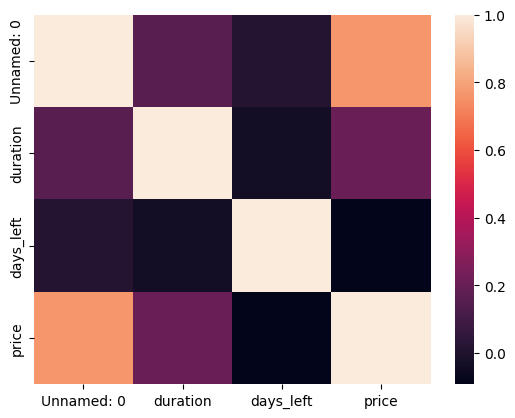

In [49]:
sns.heatmap(df.corr(numeric_only=True))

In [50]:
df.drop('days_left',axis=1,inplace=True)

In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy and clean data
df_cat = df.copy()
df_cat.columns = df_cat.columns.str.strip().str.lower().str.replace(" ", "_")

# Label encode all object (categorical) columns
label_encoders = {}
for col in df_cat.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
    label_encoders[col] = le

# Separate features and target
X_cat = df_cat.drop("price", axis=1)
y_cat = df_cat["price"]

# Select only categorical features (originally object type)
cat_features = [col for col in X_cat.columns if col in label_encoders]

# Run chi-squared test
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_cat[cat_features], y_cat)

# Create a dataframe with scores
feature_scores = pd.DataFrame({
    'Feature': cat_features,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

feature_scores

,Feature,Chi2 Score
1,flight,3.775951e+07
4,stops,3.622407e+05
2,source_city,3.254806e+05
6,destination_city,2.992350e+05
0,airline,2.494078e+05
7,class,9.345750e+04
3,departure_time,7.593060e+04
5,arrival_time,7.117346e+04


<Axes: xlabel='Chi2 Score', ylabel='Feature'>

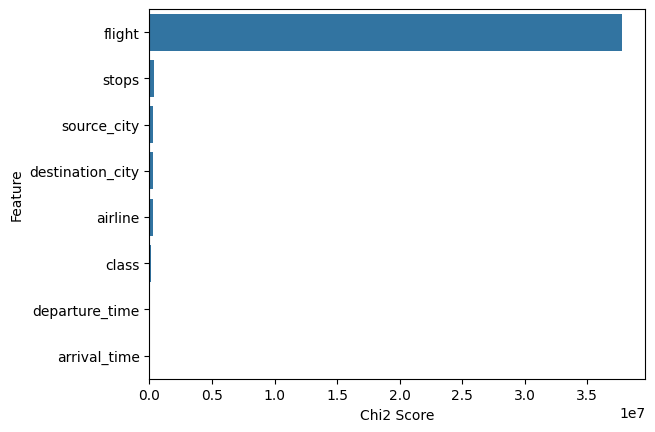

In [52]:
sns.barplot(x='Chi2 Score',y='Feature',data=feature_scores)

In [53]:
df.drop('class',axis=1,inplace=True)
df.drop('departure_time',axis=1,inplace=True)
df.drop('arrival_time',axis=1,inplace=True)

In [54]:
df.head()

,Unnamed: 0,airline,flight,source_city,stops,destination_city,duration,price
0,0,SpiceJet,SG-8709,Delhi,zero,Mumbai,2.17,5953
1,1,SpiceJet,SG-8157,Delhi,zero,Mumbai,2.33,5953
2,2,AirAsia,I5-764,Delhi,zero,Mumbai,2.17,5956
3,3,Vistara,UK-995,Delhi,zero,Mumbai,2.25,5955
4,4,Vistara,UK-963,Delhi,zero,Mumbai,2.33,5955


In [55]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
stops                object
destination_city     object
duration            float64
price                 int64
dtype: object

In [57]:
dfe=pd.get_dummies(df[['airline','flight','source_city','stops','destination_city']],drop_first=True,dtype=int)
dfe

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-105,flight_6E-113,flight_6E-121,flight_6E-123,flight_6E-126,...,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,stops_two_or_more,stops_zero,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300149,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300150,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300151,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
